In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv("C:/Users/Karan Jadhav/OneDrive/Desktop/Prodigy_Infotech_DS/Prodigy_Infotech_DS_Task_03/bank-full.csv", sep=";")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
df.shape

(45211, 12)

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'campaign', 'previous', 'poutcome', 'y'],
      dtype='object')

In [19]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
campaign      int64
previous      int64
poutcome     object
y            object
dtype: object

In [20]:
df.dtypes.value_counts()

object    8
int64     4
Name: count, dtype: int64

In [21]:
df.duplicated().sum()

416

In [22]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
campaign     0
previous     0
poutcome     0
y            0
dtype: int64

In [23]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome',
       'y'],
      dtype='object')
Index(['age', 'balance', 'campaign', 'previous'], dtype='object')


In [24]:
df.describe()

,age,balance,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,0.580323
std,10.618762,3044.765829,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000
25%,33.000000,72.000000,1.000000,0.000000
50%,39.000000,448.000000,2.000000,0.000000
75%,48.000000,1428.000000,3.000000,0.000000
max,95.000000,102127.000000,63.000000,275.000000


In [25]:
df.describe(include='object')

,job,marital,education,default,housing,loan,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,4,2
top,blue-collar,married,secondary,no,yes,no,unknown,no
freq,9732,27214,23202,44396,25130,37967,36959,39922


In [26]:
from sklearn.preprocessing import LabelEncoder
 #	Encode	all	categorical	(object) columns
label_encoders	= {}
for	column	in	df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

C:\Users\Karan Jadhav\AppData\Local\Temp\ipykernel_20872\2342203523.py:3: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\Karan Jadhav\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


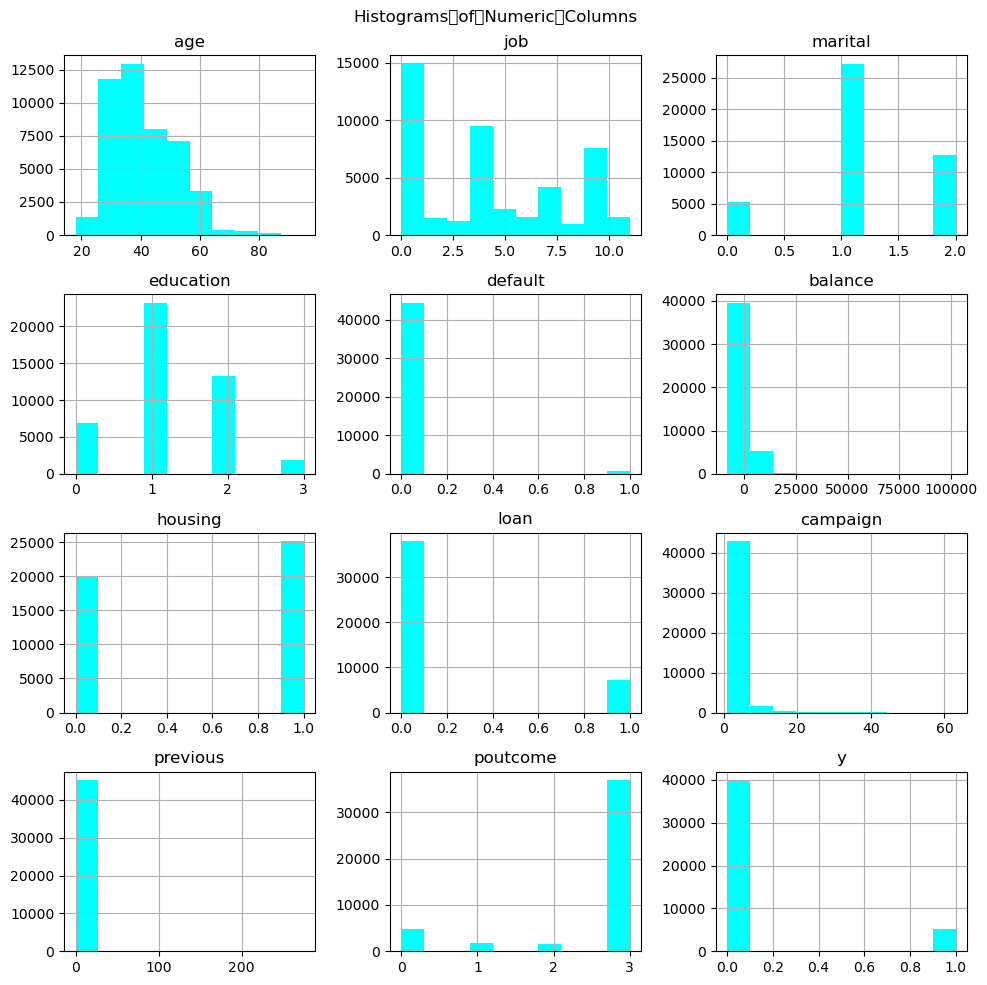

In [27]:
df.select_dtypes(include=['number']).hist(figsize=(10,	10),	color='#00FFFF')
plt.suptitle("Histograms	of	Numeric	Columns")
plt.tight_layout()
plt.show()

In [28]:
X = df.drop('y',	axis=1)
y =	df['y']

In [29]:
from sklearn.model_selection import	train_test_split
 #	Split	dataset
X_train, X_test, y_train, y_test = train_test_split(X,	y,	test_size=0.2,	random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
 #	Initialize	and	train	the	classifier
clf	= DecisionTreeClassifier(random_state=42)
clf.fit(X_train,	y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
from	sklearn.metrics	import	accuracy_score,	confusion_matrix,	classification_report
y_pred	=	clf.predict(X_test)
print("Accuracy:",	accuracy_score(y_test,	y_pred))
print("Confusion	Matrix:\n",	confusion_matrix(y_test,	y_pred))
print("Classification	Report:\n",	classification_report(y_test,	y_pred))


Accuracy: 0.8154373548601128
Confusion	Matrix:
 [[7072  880]
 [ 789  302]]
Classification	Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      7952
           1       0.26      0.28      0.27      1091

    accuracy                           0.82      9043
   macro avg       0.58      0.58      0.58      9043
weighted avg       0.82      0.82      0.82      9043



In [33]:
df = pd.read_csv("C:/Users/Karan Jadhav/OneDrive/Desktop/Prodigy_Infotech_DS/Prodigy_Infotech_DS_Task_03/bank-full.csv", sep=";")

In [35]:
from	sklearn.preprocessing	import	LabelEncoder
for	col	in	df.select_dtypes(include='object'):
    df[col]	=	LabelEncoder().fit_transform(df[col])
 #	Columns	to	clean	outliers	from
columns_to_clean	=	['age',	'campaign',	'duration']
 #	Apply	IQR	method	to	each	column
for	col	in	columns_to_clean:
    Q1	=	np.percentile(df[col],	25)
    Q3	=	np.percentile(df[col],	75)
    IQR	=	Q3	-	Q1
    lower_bound	=	Q1	-	1.5	*	IQR
    upper_bound	=	Q3	+	1.5	*	IQR
 #	Filter	only	the	rows	within	bounds
    df	=	df[(df[col]	>=	lower_bound)	&	(df[col]	<=	upper_bound)]
 #	Result:	df	is	now	without	outliers	in	'age',	'campaign',	'duration'
print("Outliers	removed.	New	shape	of	data:",	df.shape)

Outliers	removed.	New	shape	of	data: (38690, 17)


Full	Correlation	Matrix:
                age       job   marital  education   default   balance  \
age        1.000000 -0.028848 -0.413948  -0.099523 -0.015199  0.086426   
job       -0.028848  1.000000  0.059555   0.164480 -0.010161  0.018111   
marital   -0.413948  0.059555  1.000000   0.107635 -0.006060  0.002458   
education -0.099523  0.164480  0.107635   1.000000 -0.012924  0.067649   
default   -0.015199 -0.010161 -0.006060  -0.012924  1.000000 -0.066353   
balance    0.086426  0.018111  0.002458   0.067649 -0.066353  1.000000   
housing   -0.152613 -0.123963 -0.024365  -0.098628 -0.007929 -0.064447   
loan       0.002817 -0.029352 -0.049869  -0.048026  0.074148 -0.081204   
contact    0.038888 -0.079340 -0.048046  -0.118371  0.022161 -0.029907   
day       -0.008590  0.019292 -0.004163   0.024437  0.006594  0.010576   
month     -0.043761 -0.086917 -0.008912  -0.051310  0.018377  0.024963   
duration  -0.035592 -0.003949  0.020768   0.002583 -0.002559  0.010308   
campaign   0.

C:\Users\Karan Jadhav\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Karan Jadhav\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\Karan Jadhav\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


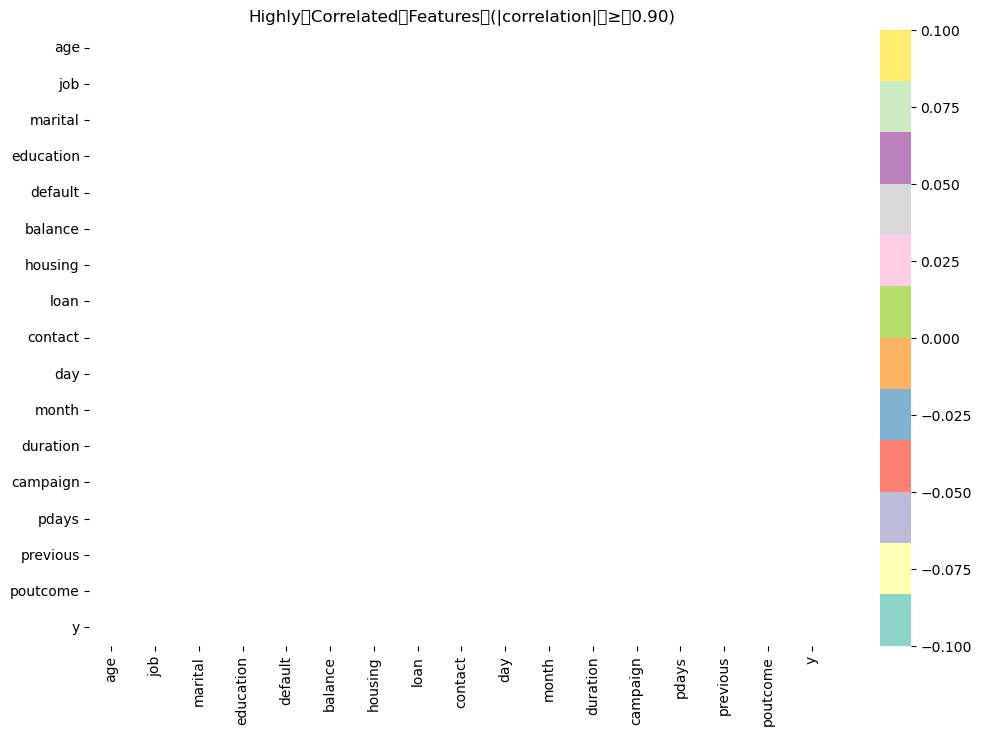

In [36]:
from	sklearn.preprocessing	import	LabelEncoder
cat_cols	=	df.select_dtypes(include=['object']).columns
label_encoders	=	{}
for	col	in	cat_cols:
    le	=	LabelEncoder()
    df[col]	=	le.fit_transform(df[col])
    label_encoders[col]	=	le

corr	=	df.corr()
print("Full	Correlation	Matrix:")
print(corr)
high_corr	=	corr[(abs(corr)	>=	0.90)	&	(abs(corr)	<	1.0)]		#	exclude	perfect	self-correlation	(1.0)
plt.figure(figsize=(12,	8))
sns.heatmap(high_corr,	annot=True,	cmap='Set3',	linewidths=0.2,	mask=high_corr.isnull())
plt.title("Highly	Correlated	Features	(|correlation|	≥	0.90)")
plt.show()

In [43]:
from sklearn import	tree
plt.figure(figsize=(20,	10))
tree.plot_tree(clf,	feature_names=X.columns, class_names=label_encoders['age'].classes_,	filled=True)
plt.title("Decision	Tree")
plt.show()

KeyError: 'age'

<Figure size 2000x1000 with 0 Axes>

In [40]:
from sklearn.tree import DecisionTreeClassifier,	plot_tree
from sklearn.preprocessing import LabelEncoder

label_encoders	=	{}
for	col	in	df.select_dtypes(include='object').columns:
    le	=	LabelEncoder()
    df[col]	=	le.fit_transform(df[col])
    label_encoders[col]	=	le
X	=	df.drop(columns='y')
y	=	df['y']
dt	=	DecisionTreeClassifier(max_depth=4,	random_state=0)		#	adjust	max_depth	for	readability
dt.fit(X,	y)
cn	=	label_encoders['y'].classes_
plt.figure(figsize=(30,	10))
plot_tree(dt,	class_names=cn,	feature_names=X.columns,	filled=True,	rounded=True,	fontsize=10)
plt.title("Decision	Tree	on	Bank	Dataset")
plt.show()

KeyError: 'y'